# Machine Learning HW


Based on https://www.kaggle.com/buddhiniw/breast-cancer-prediction

Dataset from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In this scenario, we want to **predict** whether a tumor detected in a person is Malignant (M) or Benign (B). This is a task that we can accomplish using data science, and it is also an extremely useful demonstration of the data science lifecycle in action

In [1]:
# Importing libraries - Gets us the software packages we need to do stuff
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## Gathering Data

The first step in the data science lifecycle is gathering your data. Without it, you can't make any inferences or predictions.

If you are working in a hospital, you would likely get medical data straight from the source. However, for our purposes, we can use a publicly available dataset from Kaggle.com (a great resource if you want to explore datasets in general)

In [2]:
# Loading our data and storing it in a variable so that we can refer to it later

cancer_df = pd.read_csv("data.csv")

In [3]:
# Looking at the first few rows of our data

cancer_df.head(15)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78         17.89          103.60      781.0   
12    846226         M        19.17         24.80          132.40     1123.0   
13    846381         M        15.85         23.95          103.70      782.7   
14  84667401         M        13.73         22.61           93.60      578.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   

    ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0   ...          17.33           184.60      2019.0            0.1622   
1   ...          23.41           158.80      1956.0            0.1238   
2   ...          25.53           152.50      1709.0            0.1444   
3   ...          26.50            98.87       567.7            0.2098   
4   ...          16.67           152.20      1575.0            0.1374   
5   ...          23.75           103.40       741.6            0.1791   
6   ...          27.66           153.20      1606.0            0.1442   
7   ...          28.14           110.60       897.0            0.1654   
8   ...          30.73           106.20       739.3            0.1703   
9   ...          40.68            97.65       711.4            0.1853   
10  ...          33.88           123.80      1150.0            0.1181   
11  ...          27.28           136.50      1299.0            0.1396   
12  ...          29.94           151.70      1332.0            0.1037   
13  ...          27.66           112.00       876.5            0.1131   
14  ...          32.01           108.80       697.7            0.1651   

    compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.6656           0.7119               0.26540          0.4601   
1              0.1866           0.2416               0.18600          0.2750   
2              0.4245           0.4504               0.24300          0

Looking at our data, we see that it has 33(!) columns, describing everything from the radius of the tumor to its area, and other features. 

Of special interest is the diagnosis column, which depicts whether the tumor in that row is malignant(M) or benign(B)

Now that we got our data, we can move on to the next step

## Understanding our data

Let's see how many malignant and benign tumors we have in our data

B    357
M    212
Name: diagnosis, dtype: int64

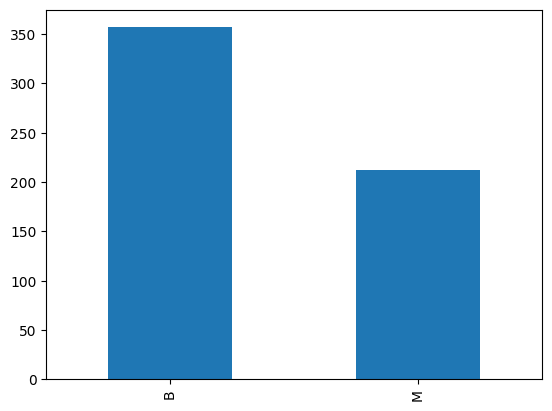

In [4]:
cancer_df['diagnosis'].value_counts().plot(kind = "bar")
cancer_df['diagnosis'].value_counts()

We see that there are 357 benign tumors and 212 malignant ones.

## Question 1

Computers don't like letters, so let's convert the diagnosis column into a column of 1s and 0s - 1 if the tumor is malignant and 0 if it is benign. This is also known as one-hot encoding!

In [5]:
cancer_df['diagnosis'] = pd.get_dummies('diagnosis')

## Question 2



Also, we have way too many columns to possibly understand in any depth. So we can look for ways to reduce the number of columns we have to work with. Luckily for us, we don't need most of the columns*

From the dataset description on Kaggle

_"The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features."_ 

Just using the mean of each feature should be enough for our case, so we can keep just the 'diagnosis' column and feature columns ending with '_mean'

Note: The ID and diagnosis columns don't count as features

In [6]:
cancer_df = cancer_df['diagnosis']
cancer_df.drop(columns = 'id', inplace=True, errors='ignore')
cancer_df

0      1.0
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
564    NaN
565    NaN
566    NaN
567    NaN
568    NaN
Name: diagnosis, Length: 569, dtype: float64

Now let's get some information about the other columns in our data

A great way of understanding numerical data is by computing summary statistics - like mean, std, etc.

In [7]:
cancer_df.describe()

count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: diagnosis, dtype: float64

But an even better way is through plots!

In [8]:
## You DO NOT HAVE TO understand this code

df = cancer_df.copy()


df.head()


features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

AttributeError: 'Series' object has no attribute 'columns'

## Question 3

From these graphs, write down 3 observations regarding benign and malignant tumors!

1. There are almost 1/3 more benign tumors than malignant.

2. The mean size of a core tumor is 72-87.

3. The area mean is broadly between 379-615

 
Notice that by understanding our data, we understand trends in the world around us! This is an integral part of data science, and these observations can be very useful for doctors when assessing whether a person has a malignant tumor or not.

But our goal is to automate the assesment process. That's the next step!

## Predicting using Machine Learning!

Now that we have examined our data and observed trends in it, we can use this data to train a machine learning model to automate the prediction task for us.


In this example, we will be using a Logistic Regression model, which simply put, 'learns' from the data we show it and predicts whether a tumor is malignant or benign.

First, we need to split our data into two parts

1. Data used to train the model
2. Data used to evaluate the model

We call the first part our training_data, and the second our test_data

In [0]:
training_data, test_data = train_test_split(cancer_df, test_size=0.3, random_state=2)
training_data.head() # common split is 80% training, 20% testing but you may have to adjust based off of dataset size

In [0]:
test_data.head()

## Question 4
We want to predict whether a tumor is malignant or not - or in other words, the diagnosis column. Typically, we represent this as the letter _y_, while the remaining features are represented by the letter _X_.

In our case, we know that the main differences between benign and malignant tumors are in their size, compactness, and concavity. So we can select a set of features (_X_) that reflects this. In this example, we can select:

1. Radius
2. Perimeter
3. Area
4. Compactness
5. Compact Points 

Hint: X_train should be similar to X_test and y_train should be similar to y_test

In [0]:
X_train = training_data.drop(columns=3,6,8,9,10,11,13,16,18,19,20,21,23,26,28,29,30,31,32)[[diagnosis]]
y_train = training_data[diagnosis]

X_test = training_data.drop(columns=3,6,8,9,10,11,13,16,18,19,20,21,23,26,28,29,30,31,32)[[diagnosis]]
y_test = training_data[diagnosis]

## Question 5

Now we can create our model and fit it to our training data - so that it 'learns' which features correspond to a malignant tumor 

In [0]:
logistic_model = LogisticRegression()
logistic_model.fit(y_train,y_test)

Now we can make predictions on our test set!

In [0]:
y_predicted_logistic = logistic_model.predict(X_test)
accuracy = metrics.accuracy_score(y_predicted_logistic,y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

In [0]:
pd.concat([pd.Series(y_predicted_logistic).reset_index(), pd.Series(y_test).reset_index()], axis = 1)[[0,'diagnosis']].rename(columns={0:'predicted','diagnosis':'actual'})

#### Let's quantify what exactly this accuracy means

Now we know that in the context of this example, predicting a tumor is benign corresponds to a '0 prediction' while a malignant prediction corresponds to a '1 prediction'. Therefore, we can plot the confusion matrix to figure out exactly what our model is getting right (and wrong).

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted_logistic)

sns.set(font_scale=3)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation


# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize = 18);
ax.set_ylabel('True labels', fontsize = 18); 
ax.set_title('Confusion Matrix', fontsize = 22); 
ax.xaxis.set_ticklabels(['benign', 'malignant'], fontsize = 14);
ax.yaxis.set_ticklabels(['benign', 'malignant'], fontsize = 14);
cm


We see that our model does a pretty good job of predicting the occurence of benign and malignant tumors. Out of the 171 test datapoints, we only misclassify 16.


From the confusion matrix, we see that:

True Negative (predicted benign, actual benign) = 99
False Negative (predicted benign, actual malignant) = 11
False Positive (predicted malignant, actual benign) = 5
True Positive (predicted malignant, actual malignant) = 56

The accuracy is one way to quantify how well our model is doing. Now let us look at a couple of others:



Accuracy = $\frac{TP + TN}{TP + TN + FP + FN} = \frac{56+99}{56+99+5+11} = \frac{155}{171} = 90.64\%$


Precision = $\frac{TP}{TP+FP} = \frac{56}{56+5} = 91.80\%$ 

Recall = $\frac{TP}{TP+FN} = \frac{56}{56+11} = 83.58\%$

F1 Score = $2*\frac{Precision * Recall}{Precision + Recall} = 87.50\%$


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53d69de7-210b-4692-854e-45d9138322dc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>